# Loan Data From Prosper Exploration

## Investigation Overview

In this investigation, I'm most interested in figuring out What factors affect a loan’s outcome status and the factor that affects the borrower’s APR or interest rate.


## Dataset Overview
There are 113937 loan entries in the dataset with 81 features. Most variables such as Term, BorrowerRate, MonthlyLoanPayment, StatedMonthlyIncome, LoanOriginalAmount, BorrowerAPR, DebtToIncomeRatio etc are numeric variables, while others (LoanStatus, ProsperScore, ListingCategory, EmploymentStatus, IsBorrowerHomeowner etc) are categorical factor variables. 14 features containing the main variables of interest were chosen from the main dataset for the exploration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Reading the csv file into a pandas dataframe
file = pd.read_csv('prosperLoanData.csv')


In [3]:
#changing the 'ListingCategory (numeric)' column to it's original values as contained in the data dictionary
file['ListingCategory (numeric)'] = file['ListingCategory (numeric)'].replace({0: 'Not available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business',
                                             4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby and Adoption', 9: 'Boat', 10: 'Cosmetic procedures',
                                            11 : 'Engagement ring', 12: 'Green loans', 13: 'Household Expenses', 14: 'Large purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 
                                                        17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding loans'})


In [4]:
#renaming the 'ListingCategory (numeric)' column
file = file.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'})

In [5]:
#changing the 'LoanOriginationDate' datatype to datetime
file['LoanOriginationDate']=  pd.to_datetime(file['LoanOriginationDate'])

In [6]:
#creating a year column
file['Loan_year'] = file['LoanOriginationDate'].dt.year

In [7]:
#Combining all loanstatus containing 'past due' as one entry
file['LoanStatus'] = file['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due' )

In [8]:
#Extracting the 15 variables needed for our exploration and naming the new dataframe as df
df = file[['Term', 'LoanStatus', 'BorrowerRate', 'ProsperScore','ListingCategory','MonthlyLoanPayment', 'Loan_year', 'LoanOriginalAmount',
          'BorrowerAPR', 'EmploymentStatus', 'DebtToIncomeRatio', 'IncomeRange', 'IsBorrowerHomeowner', 'BorrowerState']]

## Distribution of BorrowerAPR
The BorrowerAPR is the Borrower's Annual Percentage Rate (APR) for the loan. It takes a minimum value of 0.00653 and a maximum value of 0.51229 as the highest. When plotted as a histogram, it is normally distributed with a little spike around 0.35

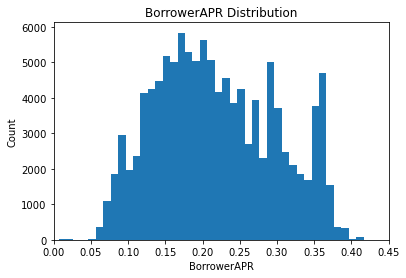

In [9]:
#inspecting the distribution of the BorrowerApr
bins = np.arange(df['BorrowerAPR'].min(), df['BorrowerAPR'].max(), 0.01)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.xlim(0, 0.45)
plt.xlabel('BorrowerAPR')
plt.ylabel('Count')
plt.title('BorrowerAPR Distribution');

## Distribution of BorrowerRate
The BorrowerRate is the Borrower's interest rate for this loan. It takes a minimum value of 0.0 and a maximum value of 0.4975 as the highest. When plotted as a histogram, The BorrowerRate seems to be slightly right skewed with a high count occurring at 0.32

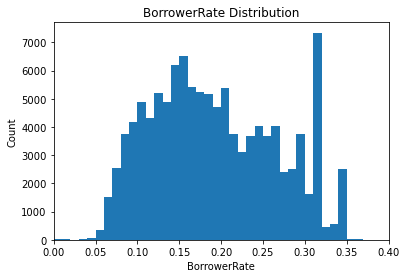

In [10]:
#checking the distribution of the BorrowerRate
bins = np.arange(df['BorrowerRate'].min(), df['BorrowerRate'].max(), 0.01)
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlim(0, 0.4)
plt.xlabel('BorrowerRate')
plt.ylabel('Count')
plt.title('BorrowerRate Distribution');

## Distribution of the LoanStatus
The LoanStatus is the current status of the loan which is either Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. 
The LoanStatus barchart shows that 10.5% were charged off from the loan, 4.4% Defaulted and 33.4% completed their loan.

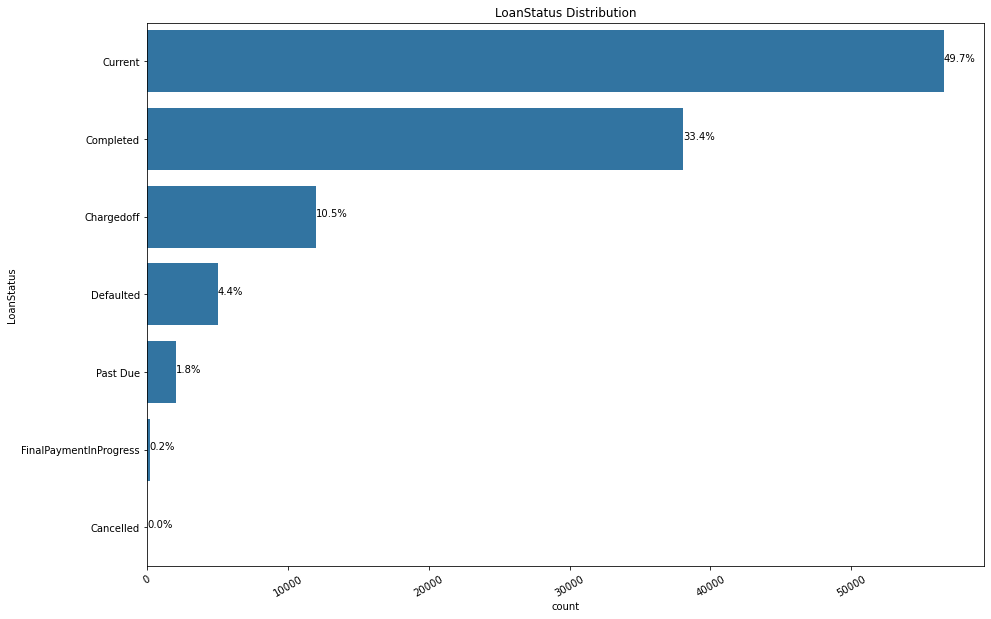

In [11]:
status_counts = df['LoanStatus'].value_counts()
status_counts_sum = df['LoanStatus'].value_counts().sum()
prop = status_counts[0]/status_counts_sum
prop
#plotting for the distribution of LoanStatus
base_color = sns.color_palette()[0]
plt.figure(figsize = [15, 10])
for v in range(status_counts.shape[0]):
    f = status_counts[v]
    texts = '{:0.1f}%'.format(100 * f/status_counts_sum )
    plt.text(f, v, texts)
    ordered = df['LoanStatus'].value_counts().index
    sns.countplot(data = df, y= 'LoanStatus', color = base_color, order = ordered)
    plt.xticks(rotation = 30)
    plt.title('LoanStatus Distribution')

## The BorrowerAPR vs ProsperScore and vs LoanOriginalAmount
The BorrowerAPR showed a slight negatitve correlation with the LoanOriginalAmount, and also a moderate negative correlation with the ProsperScore. This means that borrowers with higher ProsperScore would have lower BorrowerAPR.

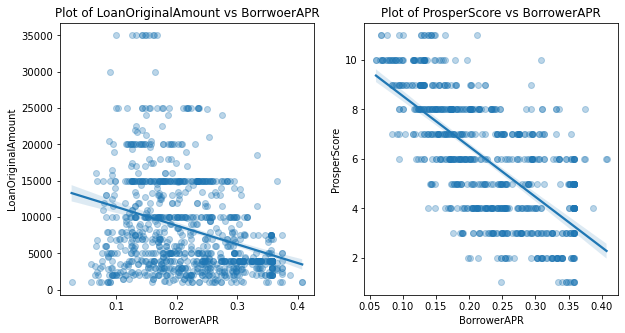

In [12]:
#making a copy of the dataset
df_copy = df.copy()

#since the scatter plot is giving us too clustered points, let's create a sample of the dataset
sample = df_copy.sample(1000)

#plotting the LoanOriginalAmount vs BorrowerAPR
plt.figure(figsize =(10, 5))
plt.subplot(1, 2, 1)
sns.regplot(data= sample, x = 'BorrowerAPR', y = 'LoanOriginalAmount', scatter_kws = {'alpha': 0.3})
plt.title('Plot of LoanOriginalAmount vs BorrwoerAPR');

#plotting the ProsperScore vs BorrowerAPR
plt.subplot(1, 2, 2)
sns.regplot(data= sample, x = 'BorrowerAPR', y = 'ProsperScore', scatter_kws = {'alpha': 0.3})
plt.title('Plot of ProsperScore vs BorrowerAPR');

## Relationship between the LoanOriginalAmount and the BorrowerRate
I made a heatmap plot of the relationship between the LoanOriginalAmount and the BorrowerRate to know if the borrower rate can affect the amount given to the borrower.
We can see from the chart above, that there is a slight negative correlation between the BorrowerRate and the LoanOriginalAmount.

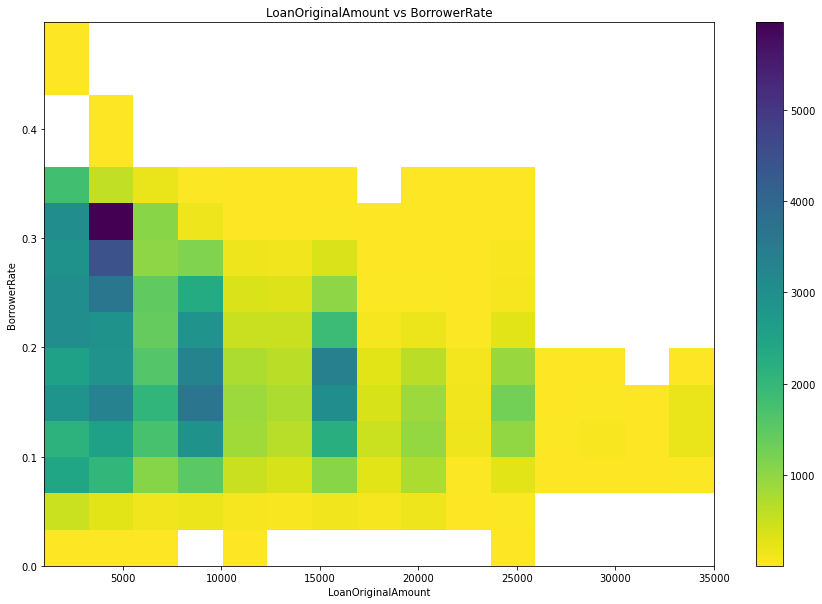

In [13]:
#plotting a histogram of LoanOriginalAmount vs BorrowerRate
plt.figure(figsize =(15, 10))
plt.hist2d(data = df_copy, x = 'LoanOriginalAmount', y = 'BorrowerRate', cmap = 'viridis_r', cmin = 0.3, bins = 15)
plt.colorbar()
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerRate')
plt.title('LoanOriginalAmount vs BorrowerRate');

## BorrowerRate vs LoanStatus
To further explore the data, I decided to find out why some borrowers could'nt complete their loan by plotting the BorrowerRate vs LoanStatus using a violin plot. The Borrowers with completed and current loanStatus show to have lower BorrowerRate, while those of the pastDue, Defaulted, and chareged off have higher BorrowerRates.

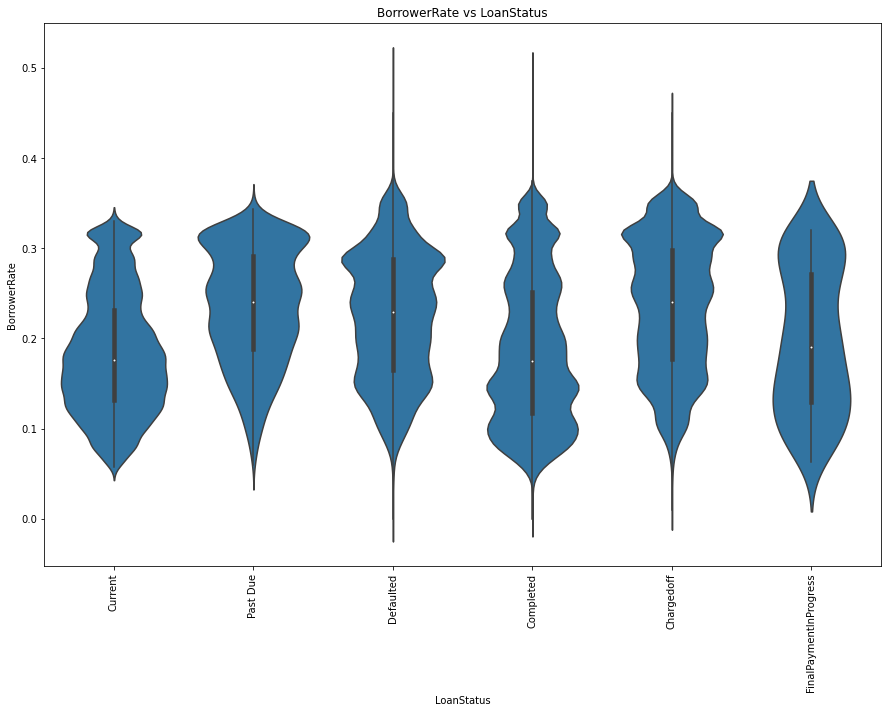

In [14]:
#creating a violin plot for BorrowerRate vs LoanStatus
plt.figure(figsize = (15, 10))
status = ['Current', 'Past Due', 'Defaulted', 'Completed', 'Chargedoff',
       'FinalPaymentInProgress']
List = pd.api.types.CategoricalDtype(ordered = True, categories = status)
df_copy['LoanStatus'] = df_copy['LoanStatus'].astype(List)
sns.violinplot(data = df_copy, x = 'LoanStatus', y = 'BorrowerRate', color = base_color)
plt.xticks(rotation = 90)
plt.title('BorrowerRate vs LoanStatus');

## correlation patterns between numerical variables
Using the Heatmap, the various observations were made:

>- The borrower's DebtToIncomeRatio is not correlated to any variable.
>- The ProsperScore showed a negative correlation with the BorrowerRate and BorrowerAPR which means borrower's with high prosper can be reliable, hence they get low BorrowerRate and BorrowerAPR
>- The LoanOriginalAmount is slightly negatively corrleated to BorrowerRate and BorrowerAPR


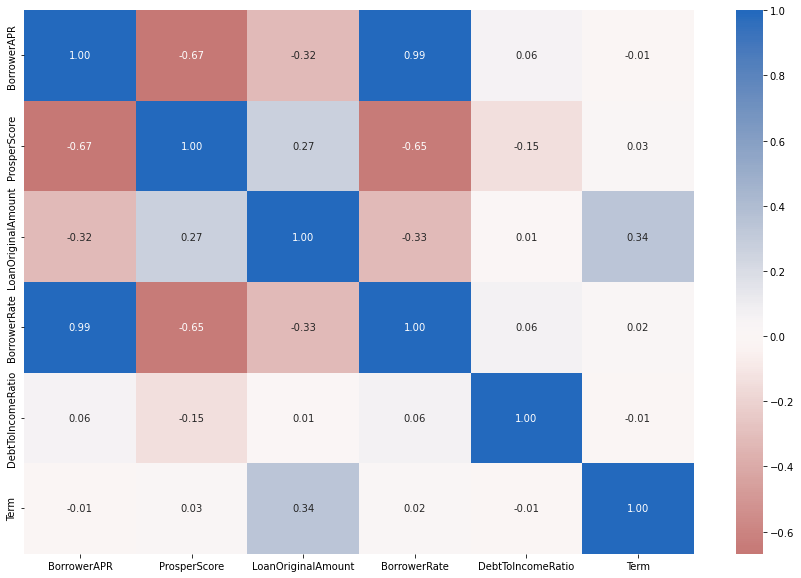

In [15]:
#creating a histogram to identify correlation patterns between numerical variables 
plt.figure(figsize = (15, 10))
correlation_variables =df_copy[['BorrowerAPR', 'ProsperScore', 'LoanOriginalAmount', 'BorrowerRate', 'DebtToIncomeRatio', 'Term']]
sns.heatmap(correlation_variables.corr(), annot = True, cmap = 'vlag_r', center = 0, fmt = '.2f');

## BorrowerRate and LoanOriginalAmount by MonthlyLoanPayment
This bubble chart shows the relationship between the BorrowerRate, LoanOriginalAmount and MonthlyLoanPayment plotted with varying sizes. It shows that the MonthlyLoanPayment increases with an increased Loan amount and a decresed BorrowerRate.

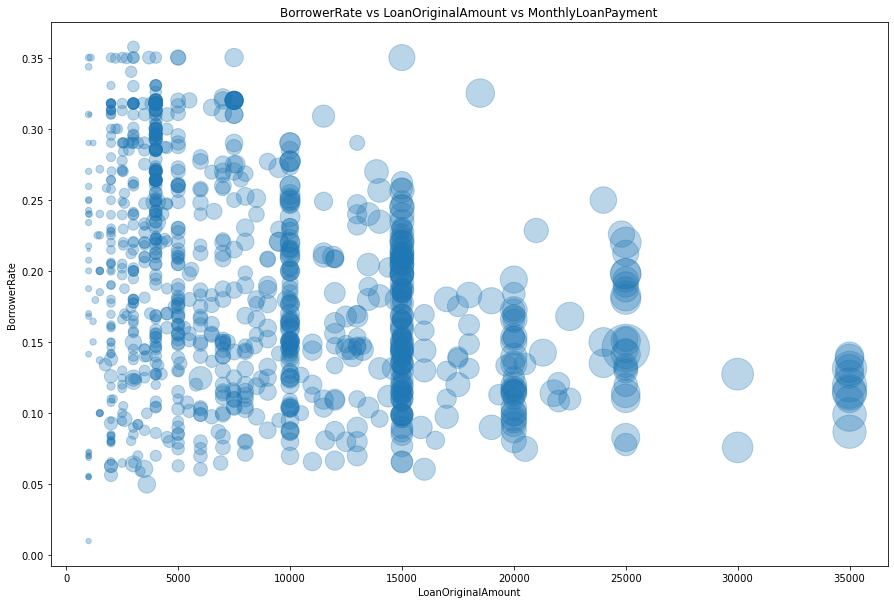

In [16]:
# creating a bubble plot for the relationship between BorrowerRate, LoanOriginalAmount and MonthlyLoanPayment
plt.figure(figsize = (15, 10))
plt.scatter(data = sample, x = 'LoanOriginalAmount', y = 'BorrowerRate',  s ='MonthlyLoanPayment', alpha = 0.3)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerRate')
plt.title('BorrowerRate vs LoanOriginalAmount vs MonthlyLoanPayment');

##  BorrowerRate and  ProsperScore by IsBorrowerHomeowner
Looking at the relationship between BorrowerRate VS ProsperScore VS IsBorrowerHomeowner, we can see that homeowners whose prosperscore is below 4 has a higher borrowerrate, while homeowners whose prosperscore is greater has a lower borrowerrate. The same thing applies to the relationship between BorrowerAPR VS ProsperScore VS IsBorrowerHomeowner, as the BorrowerAPR is strongly correlated to the BorrowerRate.

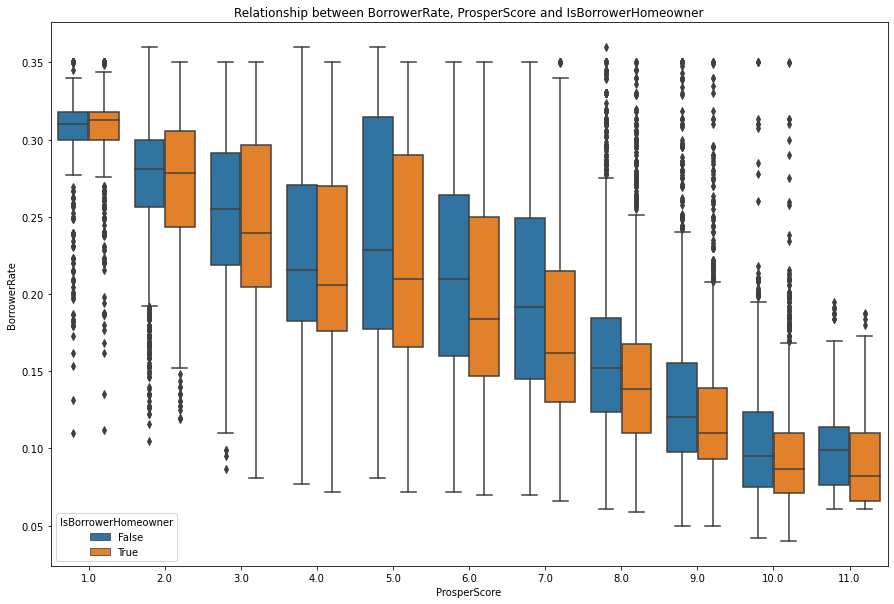

In [17]:
#checking the relationship between BorrowerRate, ProsperScore and IsBorrowerHomeowner
plt.figure(figsize = (15, 10))
sns.boxplot(data = df, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner')
plt.title('Relationship between BorrowerRate, ProsperScore and IsBorrowerHomeowner');

In [ ]:
!jupyter nbconvert Project_Loan_Data_From_Prosper_part2.ipynb --to slides --post serve --no-input --no-prompt